# Proper Orthogonal Decomposition Example 2

Author: Katiana Kontolati \
Date: August 27, 2020

In this example, the diffusion equation is solved and then methods from the POD class are used to decompose the output solutions/dataset and extract its basis functions which can be used for the reconstruction of the solution. 

## 2D Diffusion equation
> $\displaystyle \frac{\partial U}{\partial t} = D \bigg(\frac{\partial^2 U}{\partial x^2} + \frac{\partial^2 U}{\partial y^2}\bigg)$
> <br>
> <br>
> where $D$ is the diffusion coefficient. $U$ describes the behavior of the particles in Brownian motion, resulting from their random movements and collisions.
<img src="plate_and_disc.png" alt="plate_and_disc.png" height="160" width="160" align=right>

### Problem description:

>  - A 2D metal plate is initially at temperature $T_{cool}$.
>  - A disc of a specified size inside the plate is at temperature $T_{hot}$. 
>  - Suppose that the edges of the plate are held fixed at $T_{cool}$. 
>  - The diffusion equation is applied to follow the evolution of the temperature of the plate.

Import the necessary libraries. Here we import standard libraries such as numpy, matplotlib, and we also import the POD class from UQpy.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from UQpy.DimensionReduction import DirectPOD, SnapshotPOD, HOSVD
from DiffusionEquation import diffusion
import time

The diffusion equation is solved by calling the 'diffusion' function and a dataset (list) is obtained. To run this function the following need to be specified:
>  - w, h - Plate size, mm
>  - dx, dy - Intervals in x-, y- directions, mm
>  - D - Thermal diffusivity, mm2.s-1
>  - Tcool, Thot - Plate and disc temperature
>  - r, cx, cy - Initial conditions - ring of inner radius r, width dr centred at (cx,cy) (mm)
>  - nsteps - Number of time steps

In [2]:
w = h = 5.
dx, dy = 0.1, 0.1
D = 5
Tcool, Thot = 400, 700
r, cx, cy = 1.5, 2.5, 2.5
nsteps = 500

Data = diffusion(w, h, dx, dy, D, Tcool, Thot, r, cx, cy, nsteps)

The Direct POD method is used to reconstruct the data for different values of spatial modes. Full reconstruction is achieved when the number of modes chosen equals the number of dimensions. Since the dataset for this problem is large, the Snapshot POD is recommended as the decomposition will be performed much faster.  

In [3]:
start_time = time.time()

n_modes = [1, 2, 3, 4, 40, 50]
frame = 40

Data_modes = []

for i in range(len(n_modes)):
    pod = DirectPOD(input_sol=Data, modes=n_modes[i], verbose=False)
    Data_reconstr, Data_reduced = pod.run()
    Data_modes.append(Data_reconstr[:,:,frame])
    del Data_reconstr

elapsed_time = time.time() - start_time
time.strftime("%H:%M:%S", time.gmtime(elapsed_time))
print('Elapsed time: ', elapsed_time)

Elapsed time:  33.186609983444214


Comparison of input and reduced solution.

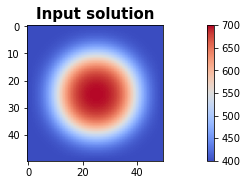

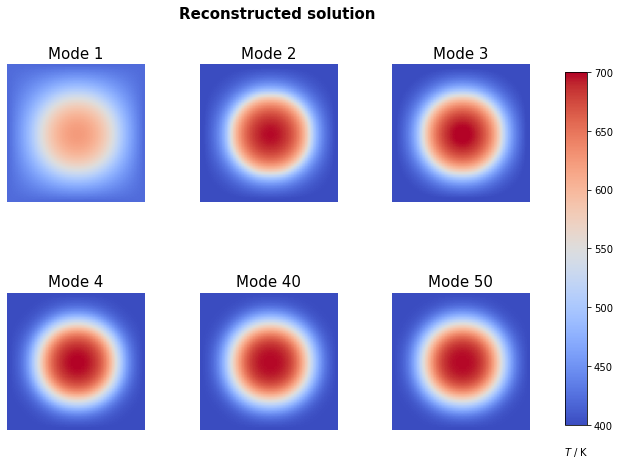

In [4]:
# Plot input solution
plt.figure(figsize = (16,2.5))
c = plt.imshow(Data[frame], cmap=plt.get_cmap('coolwarm'), vmin=Tcool,vmax=Thot)
plt.colorbar(c) 
plt.title('Input solution',fontweight ="bold",size=15) 
plt.show() 

# Plot reduced solution
fig = plt.figure(figsize=(10,7))
fig.subplots_adjust(hspace=0.5, wspace=0.4)
for i in range(len(n_modes)):
    ax = fig.add_subplot(2, 3, i+1)
    im = ax.imshow(Data_modes[i], cmap=plt.get_cmap('coolwarm'), vmin=Tcool,vmax=Thot)
    ax.set_axis_off()
    ax.set_title('Mode {}'.format(n_modes[i]),size=15)
    
fig.subplots_adjust(right=0.85)
cbar_ax = fig.add_axes([0.9, 0.15, 0.03, 0.7])
cbar_ax.set_xlabel('$T$ / K', labelpad=20)
fig.colorbar(im, cax=cbar_ax)
fig.suptitle('Reconstructed solution',fontweight="bold",size=15)
plt.show()